# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns

# Reading data

In [2]:
data = pd.read_csv('data.csv')

In [3]:
# Setting id as index
data.set_index('id', inplace = True)

# Preprocessing of data

In [4]:
# Selecting features
X = data.iloc[:,1:-1]
# Selecting dependable variable
y = data.iloc[:,0]

In [5]:
# Encoding categorical data
labelencoder_y_1 = LabelEncoder()
y_1 = labelencoder_y_1.fit_transform(y)

In [6]:
# Predict multicollinearity by directly looking at the eigen vector of a correlation matrix.
# Values close to zero indicate multicolineairty
corr = X.corr()
eigenvalues, eigenvectors = np.linalg.eig(corr)
np.round(eigenvalues, 0)

array([13.,  6.,  3.,  2.,  2.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.])

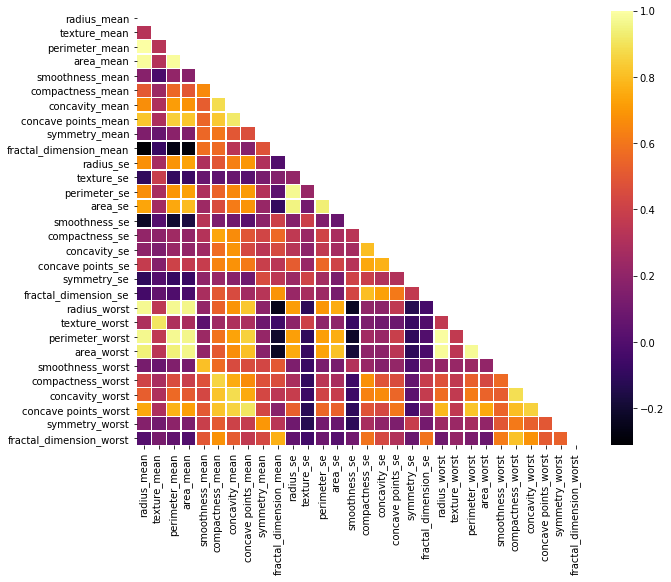

In [7]:
# Assessing correlation between most important features
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (10,8))
sns.heatmap(corr, linewidth=0.5,cmap = 'inferno', mask = mask)
plt.show()

In [8]:
X.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [9]:
# dropping features showing high correlation/multicolinearity
X2 = X.drop(['area_mean','perimeter_mean', 'perimeter_worst', 'area_se','texture_worst',
             'area_worst','radius_worst','radius_se','concave points_mean',
             'smoothness_worst','radius_mean','concavity_mean','concave points_worst','compactness_mean'], axis = 1)

In [10]:
# Predict multicollinearity by directly looking at the eigen vector of a correlation matrix.
# Values close to zero indicate multicolineairty
corr = X2.corr()
eigenvalues, eigenvectors = np.linalg.eig(corr)
np.round(eigenvalues, 0)

array([7., 2., 2., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

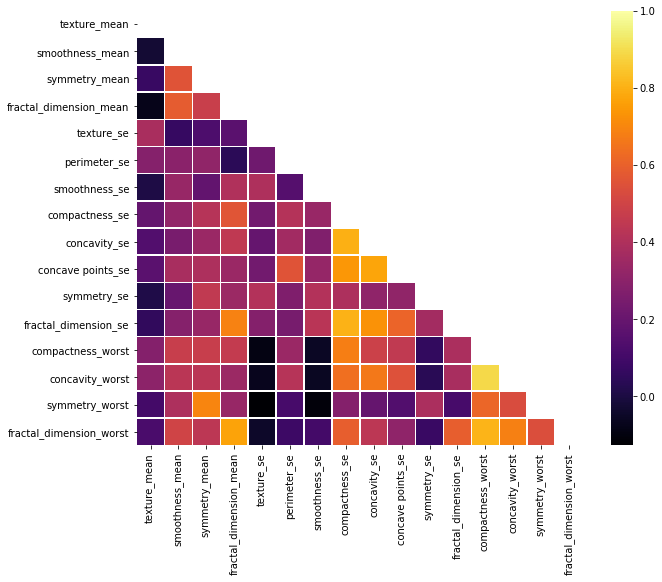

In [11]:
# Re-assessing correlation between most important features
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (10,8))
sns.heatmap(corr, linewidth=0.5,cmap = 'inferno', mask = mask)
plt.show()

In [12]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [13]:
y_test

id
915691      M
9112367     B
909410      B
892214      B
854941      B
           ..
88299702    M
864292      B
91813702    B
8610629     B
871201      M
Name: diagnosis, Length: 143, dtype: object

In [14]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Building SVC model

In [15]:
# Fitting logistic regression Classification to the Training set
classifier = SVC(random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [16]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [17]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[88,  2],
       [ 3, 50]], dtype=int64)

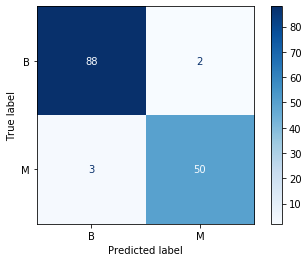

In [18]:
# Visualising the confusion matrix
plot_confusion_matrix(classifier, X_test, y_test,
                                 cmap=plt.cm.Blues)
plt.show()

In [19]:
# Applying k-Fold Cross Validation
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, n_jobs = -1)
print(f'mean accuracy: {accuracies.mean()}')
print(f'accuracy standard deviation: {accuracies.std()}')

mean accuracy: 0.9790143964562569
accuracy standard deviation: 0.02194598821040623
